# Week 4 Discussion

## Infographic

* [Python Plotting for EDA](http://pythonplot.com/): Side-by-side comparison of the major visualization libraries.

## Links

* [The Python Visualization Landscape](https://www.youtube.com/watch?v=FytuB8nFHPQ): A recent talk about visualization libraries for Python.
* [A Dramatic Tour through Python's Data Visualization Landscape](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/): Examples that show why you should know matplotlib, but should use some other library to make most of your plots. From Oct 2016, so a little outdated.
* [matplotlib Arist Tutorial](https://matplotlib.org/users/artists.html): If you want a deeper understanding of matplotlib.

## Notes

How can we make plots in Python?

Package        | Family     | Depends On
---------------|------------|-----------
[matplotlib][] | matplotlib |
[seaborn][]    | matplotlib | matplotlib
[pandas][]     | matplotlib | matplotlib
[plotnine][]   | ggplot     | matplotlib
[ggpy][]       | ggplot     | matplotlib
[altair][]     | browser    | d3.js
[plotly][]     | browser    | d3.js
[mpld3][]      | browser    | d3.js
[bokeh][]      | browser    |
[bqplot][]     | browser    | jupyter
[vega][]       | browser    | jupyter + d3.js

[matplotlib]: https://matplotlib.org/
[seaborn]: https://seaborn.pydata.org/
[pandas]: http://pandas.pydata.org/pandas-docs/stable/visualization.html
[plotnine]: http://plotnine.readthedocs.io/
[ggpy]: http://yhat.github.io/ggpy/
[altair]: https://altair-viz.github.io/
[plotly]: https://plot.ly/python/
[mpld3]: http://mpld3.github.io/
[bokeh]: https://bokeh.pydata.org/
[bqplot]: https://github.com/bloomberg/bqplot
[vega]: https://github.com/vega/ipyvega

And more...

So what should you actually use?

__Seaborn__ is stable. __Plotnine__ is convenient if you already know ggplot.

Uderstanding __matplotlib__ is useful, but using matplotlib to create plots is painful. The most important thing to know is matplotlib's jargon:

* _Figure_: Container for plots.
* _Axes_: Container for components of a plot ("primitives"). In other words, this is a single plot.
* _Axis_: Container for components of an axis. This is a single axis.
* _Tick_: A container for tick marks on an axis.

All of the containers and the primitives are called _Artists_.

What kind of plots do we usually make?

First Feature | Second Feature | Plot
--------------|----------------|:----
categorical   |                | dot, <span style="color: #aaa">bar</span>, <span style="color: #aaa">pie</span>
categorical   | categorical    | dot, mosaic, <span style="color: #aaa">bar</span>
numerical     |                | box, density, histogram
numerical     | categorical    | box, density
numerical     | numerical      | line, scatter, smooth scatter


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotnine as gg
import seaborn as sns

dogs = pd.read_feather("data/dogs.feather")
dogs.head()

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,breed,category,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0
3,Cairn Terrier,terrier,3.53,59,48.0,21992.0,35.0,13.84,2.0,435.0,324.0,weekly,high,4.0,2.0,small,14.0,10.0
4,Welsh Springer Spaniel,sporting,3.34,130,81.0,20224.0,31.0,12.49,1.0,750.0,324.0,weekly,high,5.0,4.0,medium,NaN,18.0


Dogs data from [Information is Beautiful](https://informationisbeautiful.net/visualizations/best-in-show-whats-the-top-data-dog/).

Quick notes on Pandas:

In [8]:
dogs["breed"] # get column by name

dogs.breed # get column by name

dogs.loc[:, "breed"] # get rows and columns by name or by Boolean value

dogs.iloc[:, [0, 3]] # get rows and columns by position (index)

,breed,popularity_all
0,Border Collie,45
1,Border Terrier,80
2,Brittany,30
3,Cairn Terrier,59
4,Welsh Springer Spaniel,130
5,English Cocker Spaniel,63
6,Cocker Spaniel,27
7,Papillon,38
8,Australian Cattle Dog,60
9,Shetland Sheepdog,20


In [9]:
dogs.dtypes

breed                  object
category             category
datadog               float64
popularity_all          int32
popularity            float64
lifetime_cost         float64
intelligence_rank     float64
longevity             float64
ailments              float64
price                 float64
food_cost             float64
grooming             category
kids                 category
megarank_kids         float64
megarank              float64
size                 category
weight                float64
height                float64
dtype: object

In [13]:
has_spaniel = dogs["breed"].str.contains("Spaniel") # treat breed column as a string
dogs.loc[has_spaniel, :]

,breed,category,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
4,Welsh Springer Spaniel,sporting,3.34,130,81.0,20224.0,31.0,12.49,1.0,750.0,324.0,weekly,high,5.0,4.0,medium,NaN,18.0
5,English Cocker Spaniel,sporting,3.33,63,51.0,18993.0,18.0,11.66,0.0,800.0,324.0,weekly,high,6.0,5.0,medium,30.0,16.0
6,Cocker Spaniel,sporting,3.30,27,27.0,24330.0,20.0,12.50,2.0,465.0,674.0,weekly,high,7.0,6.0,small,25.0,14.5
18,English Springer Spaniel,sporting,3.09,29,29.0,21946.0,13.0,12.54,4.0,615.0,466.0,weekly,high,19.0,9.0,medium,45.0,19.5
25,Tibetan Spaniel,non-sporting,3.02,114,73.0,25549.0,46.0,14.42,0.0,1050.0,466.0,weekly,high,26.0,14.0,small,12.0,10.0
48,English Toy Spaniel,toy,2.59,129,80.0,17521.0,45.0,10.10,0.0,925.0,405.0,weekly,medium,48.0,56.0,small,11.0,10.0
50,Cavalier King Charles Spaniel,toy,2.57,21,21.0,18639.0,44.0,11.29,2.0,1017.0,324.0,weekly,high,50.0,35.0,small,15.5,12.5
58,Clumber Spaniel,sporting,2.44,133,82.0,18084.0,37.0,10.00,0.0,1033.0,466.0,weekly,high,59.0,44.0,medium,70.0,18.5
92,American Water Spaniel,sporting,NaN,157,NaN,NaN,44.0,NaN,0.0,730.0,NaN,NaN,NaN,NaN,NaN,medium,35.0,16.5
101,Boykin Spaniel,sporting,NaN,138,NaN,NaN,NaN,NaN,NaN,531.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,16.0


### Dot Plots

Plot the number of dogs in each category.

[Text(0,0.5,'Count'), Text(0.5,0,'Category'), Text(0.5,1,'Dog Categories')]

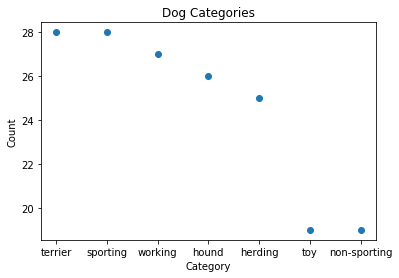

In [19]:
# Pandas
counts = dogs["category"].value_counts()

ax = counts.plot(style = "o")
ax.set(title = "Dog Categories", xlabel = "Category", ylabel = "Count")

[Text(0,0,'herding'),
 Text(0,0,'hound'),
 Text(0,0,'non-sporting'),
 Text(0,0,'sporting'),
 Text(0,0,'terrier'),
 Text(0,0,'toy'),
 Text(0,0,'working')]

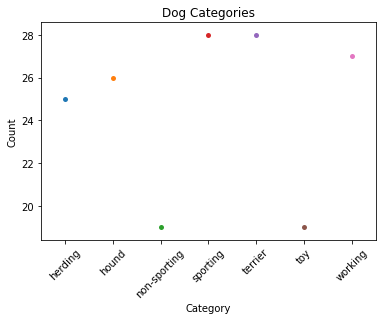

In [24]:
# Seaborn
counts = dogs["category"].value_counts()
# Pandas calls the rownames an "index"

ax = sns.stripplot(x = counts.index, y = counts)
ax.set(title = "Dog Categories", xlabel = "Category", ylabel = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

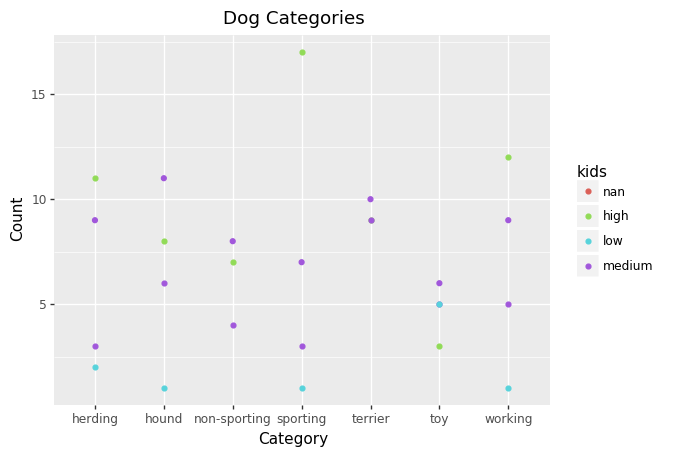

<ggplot: (8766260241812)>

In [28]:
# Plotnine

p = gg.ggplot(dogs, gg.aes(x = "category", color = "kids")) + gg.geom_point(stat = "count")
p + gg.labs(title = "Dog Categories", x = "Category", y = "Count")

### Box Plots

Plot the distribution of dog longevity, grouped by category.

Text(0.5,0.98,'')

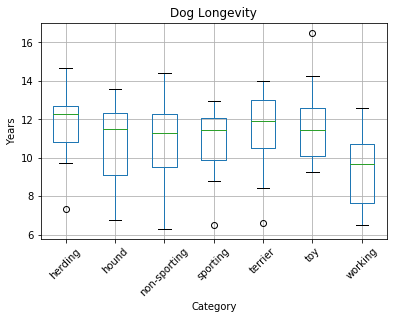

In [31]:
# Pandas

ax = dogs.boxplot(by = "category", column = "longevity", rot = 45)
# Set title and axis labels.
ax.set(title = "Dog Longevity", xlabel = "Category", ylabel = "Years")
# Hide grouping title Pandas adds.
ax.get_figure().suptitle("")

# There is also .plot.box(), but it seems to be buggy.

[Text(0,0,'herding'),
 Text(0,0,'hound'),
 Text(0,0,'non-sporting'),
 Text(0,0,'sporting'),
 Text(0,0,'terrier'),
 Text(0,0,'toy'),
 Text(0,0,'working')]

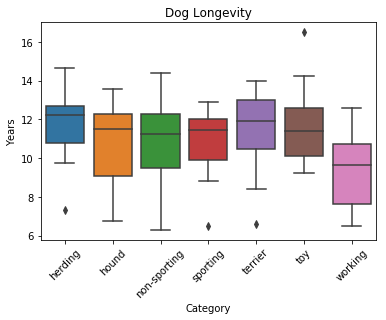

In [32]:
# Seaborn

ax = sns.boxplot(x = "category", y = "longevity", data = dogs)
ax.set(title = "Dog Longevity", xlabel = "Category", ylabel = "Years")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

/usr/lib/python3.6/site-packages/plotnine/layer.py:363: UserWarning: stat_boxplot : Removed 37 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


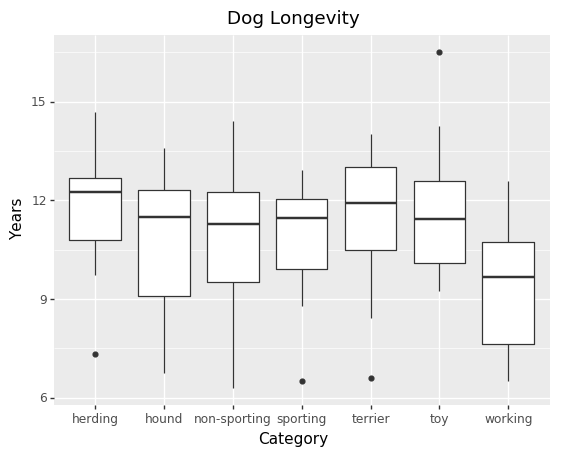

<ggplot: (8766260039158)>

In [33]:
# Plotnine

p = gg.ggplot(dogs, gg.aes("category", "longevity")) + gg.geom_boxplot()
p + gg.labs(title = "Dog Longevity", x = "Category", y = "Years")

### Scatter Plots

Plot popularity against datadog score.

In [ ]:
# Pandas

ax = dogs.plot.scatter(x = "datadog", y = "popularity")
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ylim = reversed(ax.get_ylim())
ax.set_ylim(ylim)

In [ ]:
# Seaborn

ax = sns.regplot(x = "datadog", y = "popularity", data = dogs, fit_reg = False)
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ylim = reversed(ax.get_ylim())
ax.set_ylim(ylim)

In [ ]:
# Plotnine

p = gg.ggplot(dogs, gg.aes("datadog", "popularity")) + gg.geom_point()
p + gg.labs(title = "Best in Show", x = "DataDog Score", y = "Popularity Rank")
p + gg.ylim(95, -5)

### Smooth Scatter Plots

Plot popularity against datadog score as a smooth scatter plot (or similar).

In [ ]:
# Pandas

# `sharex = False` to fix a bug with xlabel.
ax = dogs.plot.hexbin(x = "datadog", y = "popularity", gridsize = 10, sharex = False)
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ylim = reversed(ax.get_ylim())
ax.set_ylim(ylim)

In [ ]:
# Seaborn

g = sns.jointplot(x = "datadog", y = "popularity", data = dogs, kind = "hex", gridsize = 15, ylim = (95, -5))
g.set_axis_labels("DataDog Score", "Popularity Rank")

In [ ]:
# Plotnine

# Doesn't have geom_hex() yet.
p = gg.ggplot(dogs, gg.aes("datadog", "popularity")) + gg.geom_bin2d(bins = 20)
p + gg.labs(title = "Best in Show", x = "DataDog Score", y = "Popularity Rank")
p + gg.ylim(95, -5)